<a href="https://colab.research.google.com/github/hemangeede/Collaborative-filltering-jokes-recommender/blob/main/SNA_DA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Resume.csv')

In [ ]:
df1.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
df1.shape

(2484, 4)

In [ ]:
cols=[i for i in df1.columns.values]
cols.append('Skills')

In [ ]:
cols

['ID', 'Resume_str', 'Resume_html', 'Category', 'Skills']

In [ ]:
df1.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
newdf=pd.DataFrame(columns=cols)

In [ ]:
newdf.shape[1]>df1.shape[1]

True

In [ ]:
import re

In [ ]:
def extract_skills(text):
    # Pattern to capture text after 'Skills' or 'Skill Highlights' until the next section
    pattern = r'(Skills|Skill Highlights)[:\-]?\s*(.*)'
    match = re.search(pattern, text, re.IGNORECASE)

    if match:
        # Extract skills string
        skills_text = match.group(2)

        # Split skills based on common separators
        skills = re.split(r'[;,|\n]+', skills_text)

        # Clean and strip extra spaces
        skills = [skill.strip() for skill in skills if skill.strip()]

        return skills
    else:
        return []  # Return an empty list if no skills found

# Apply the function to the DataFrame
df1['Skills'] = df1['Resume_str'].apply(extract_skills)

# Display the updated DataFrame
print(df1[['ID', 'Skills']])

            ID                                             Skills
0     16852973  [as well as computer skills, knowledge of medi...
1     22323967  [Adobe Photoshop, ADP, Asset Management, brand...
2     33176873  [Recruiting  FMLA/EEO/FLSA   HRIS Development ...
3     27018550  [Type 50 wpm and 10-Key by touch  Microsoft pr...
4     17812897  [HR SKILLS  HR Department Startup  Three New O...
...        ...                                                ...
2479  99416532  [.    Managed  and  accounted  for  over  $100...
2480  24589765  [Work History     01/2014   to   Current     G...
2481  31605080  [Active Directory, Hardware, Customer Service,...
2482  21190805  [Adobe, CPR, clients, customer satisfaction, C...
2483  37473139  [and a positive work ethic makes communication...

[2484 rows x 2 columns]


In [ ]:
newdf = df1[['ID', 'Skills']]

In [ ]:
newdf.head()

,ID,Skills
0,16852973,"[as well as computer skills, knowledge of medi..."
1,22323967,"[Adobe Photoshop, ADP, Asset Management, brand..."
2,33176873,[Recruiting FMLA/EEO/FLSA HRIS Development ...
3,27018550,[Type 50 wpm and 10-Key by touch Microsoft pr...
4,17812897,[HR SKILLS HR Department Startup Three New O...


Community 1: [14491649, 27066370, 15433732, 46260230, 19234823, 99033098, 68460556, 11698189, 14106638, 83206166, 25157655, 34758680, 29999135, 59777056, 11804712, 20824105, 15941675, 77266989, 30163002, 15581242, 30826569, 20488267, 26091595, 12820557, 39247950, 34046031, 25624652, 10567764, 27164756, 31547476, 26173524, 15564893, 30646367, 17252448, 34783330, 18227306, 21807211, 48037995, 10076271, 58048626, 28745844, 13574264, 21807224, 31694970, 26919036, 99680385, 47603843, 72876163, 28614791, 29221006, 20275356, 16449694, 46514339, 24740005, 11919526, 38535335, 16605352, 20553895, 25370801, 36102323, 61677751, 13836471, 34349255, 14508237, 37560528, 14663897, 24240349, 28139742, 25067742, 11616482, 26509539, 18825446, 14278888, 42164460, 22675694, 38650096, 33964275, 24592627, 95011061, 38707449, 27295996, 38314236, 77439230, 13115648, 15802627, 40018190, 11763983, 18129173, 34185495, 23396633, 35651876, 24953126, 11174187, 51724595, 3547447, 16449850, 32563518, 21856577, 3967417

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: UserWarning: Glyph 65293 (\N{FULLWIDTH HYPHEN-MINUS}) missing from font(s) DejaVu Sans.
  super().draw(renderer)
/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1439: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  super().draw(renderer)


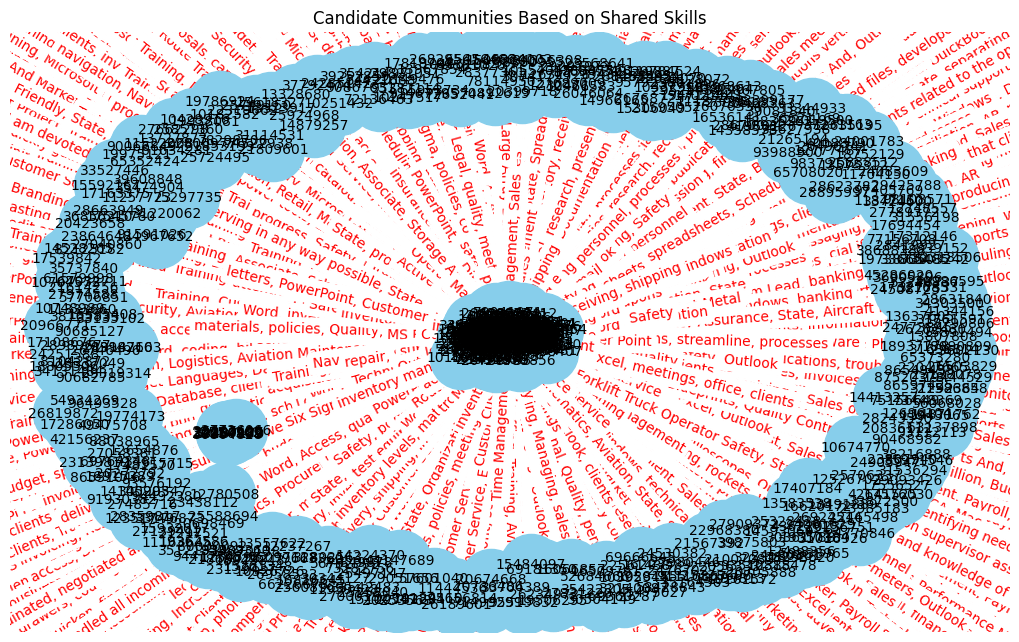

In [ ]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
# Step 1: Build the Graph
G = nx.Graph()

# Add nodes (candidates)
for idx, skills in zip(df1['ID'], df1['Skills']):
    G.add_node(idx, skills=skills)

# Add edges based on shared skills
for (id1, skills1), (id2, skills2) in combinations(zip(df1['ID'], df1['Skills']), 2):
    shared_skills = set(skills1).intersection(set(skills2))
    if shared_skills:
        G.add_edge(id1, id2, shared_skills=list(shared_skills))

# Step 2: Community Detection (using connected components for simplicity)
communities = list(nx.connected_components(G))

# Display Communities
for i, community in enumerate(communities, 1):
    print(f"Community {i}: {list(community)}")

# Step 3 (Optional): Visualize the Graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
nx.draw_networkx_edges(G, pos, width=1.5)

# Display shared skills on edges
edge_labels = nx.get_edge_attributes(G, 'shared_skills')
formatted_labels = {k: ', '.join(v) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_labels, font_color='red')

plt.title("Candidate Communities Based on Shared Skills")
plt.show()

In [ ]:
for i, community in enumerate(communities, 1):
    if(len(community)>1):
        print(i,':',len(community))

1 : 2102
30 : 8
100 : 2
219 : 2
238 : 2
